# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../train.p'
validation_file='../valid.p'
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Showing first image of each class in training set:


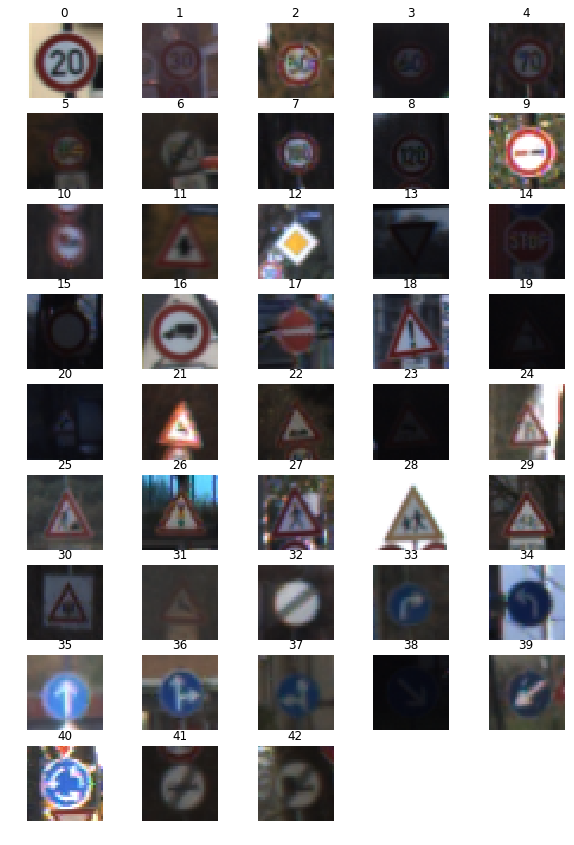

Showing number of images in each class:


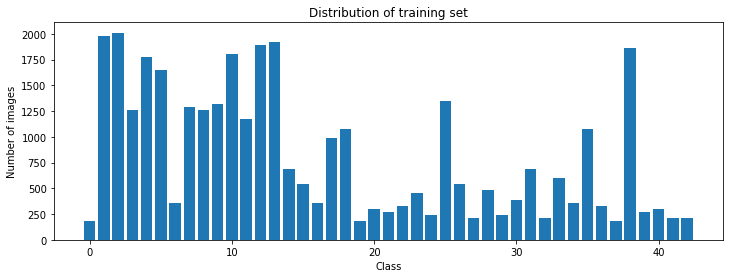

Biggest class in training set is class 2 with 2010 samples
Smallest classes in training set are classes [0, 19, 37] with 180 samples


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

print("Showing first image of each class in training set:")
num_samples_per_class = []
plt.figure(figsize = (10,18))
for i in range(0, n_classes):
    plt.subplot(11, 5, i+1) #i+1 tells it which posn to plot in
    x_select = X_train[y_train == i] #select all images to be in that class (still 4d object)
    plt.imshow(x_select[0,:,:,:]) #draw it - use all pixel data and 0 indicates pick 1st example
    plt.title(i)
    plt.axis('off')
    num_samples_per_class.append(len(x_select)) #count num per class for bar chart below
plt.show()

print("Showing number of images in each class:")
plt.figure(figsize = (12,4))
plt.bar(range(0,n_classes), num_samples_per_class)
plt.title("Distribution of training set")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.show()

smallest = min(num_samples_per_class)
biggest = max(num_samples_per_class)
smallest_class = [i for i,j in enumerate(num_samples_per_class) if j == smallest]
biggest_class = [i for i,j in enumerate(num_samples_per_class) if j == biggest]
print("Biggest class in training set is class {} with {} samples".format(biggest_class[0], biggest))
print("Smallest classes in training set are classes {} with {} samples".format(smallest_class, smallest))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
#Simple plotter to demonstrate effect of any preprocessing operations
def plotter(img1, img2, title1, title2):
    plt.figure(figsize = (4,2))
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap = 'gray')
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap = 'gray')
    plt.title(title2)
    plt.savefig('new_img')
    plt.show()
# Visualize rgb vs grayscale
def plotter_rgb_vs_gray(img1, img2, title1, title2):
    plt.figure(figsize = (4,2))
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(img2,cmap = 'gray')
    plt.title(title2)
    plt.savefig('new_image')
    plt.show()

Grayscale conversion done. X_train shape: (34799, 32, 32, 1). X_test shape: (12630, 32, 32, 1).


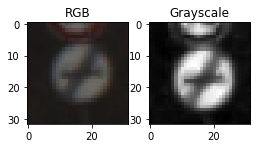

In [5]:
#Convert to grayscale
X_train_rgb = X_train
X_valid_rgb = X_valid
X_test_rgb = X_test
X_train = np.sum(X_train/3, axis = 3, keepdims = True) #axis = 3 as we have 4d array
X_valid = np.sum(X_valid/3, axis = 3, keepdims = True)
X_test = np.sum(X_test/3, axis = 3, keepdims = True)
print('Grayscale conversion done. X_train shape: {}. X_test shape: {}.'.format(X_train.shape, X_test.shape))
sample_image_rgb = X_train_rgb[1,:,:,:]
sample_image_gray = X_train[0,:,:,:]
plotter_rgb_vs_gray(sample_image_rgb.squeeze(), sample_image_gray.squeeze(), "RGB", "Grayscale")

Normalisation done


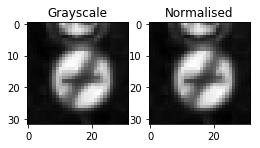

In [6]:
#Normalise the images to [-1,1] rather than [0,255] - easier for NN to process
X_train = (X_train - X_train.mean())/(X_train.std() + 1e-8)
X_valid = (X_valid - X_valid.mean())/(X_valid.std() + 1e-8)
X_test = (X_test - X_test.mean())/(X_test.std() + 1e-8)
print('Normalisation done')
sample_image_normalised = X_train[0,:,:,:]
plotter(sample_image_gray.squeeze(), sample_image_normalised.squeeze(), "Grayscale", "Normalised")

In [7]:
#Data is sequential so we should shuffle it
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
print('Shuffle of training and validation data completed')

Shuffle of training and validation data completed


In [8]:
sample_image_normalised.shape

(32, 32, 1)

Data augmentation techniques are translation, scaling, warping (affine transformation) and changing brightness
Data augmentation will be applied to classes with low count to ensure a count of at least 1000 per class
Current count for each class:


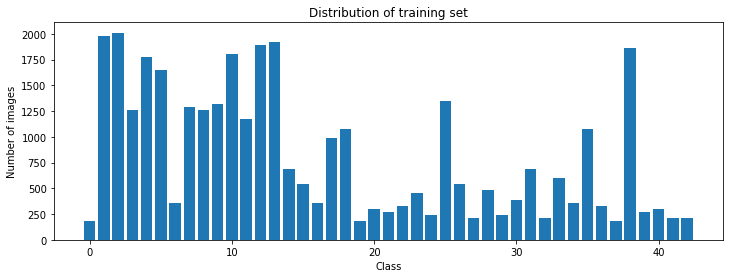

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


In [9]:
#Define transformation functions to augment data
import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows)) #does x->x+dx and y->y+dy since X = (x,y).T and compute MX
    dst = dst[:,:,np.newaxis]
    return dst

def random_scaling(img):   
    rows,cols,_ = img.shape
    # transform limits
    px = np.random.randint(-2,2)
    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    dst = dst[:,:,np.newaxis]
    return dst

def random_warp(img):
    rows,cols,_ = img.shape
    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06
    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4
    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst = dst[:,:,np.newaxis]
    return dst

def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst


print('Data augmentation techniques are translation, scaling, warping (affine transformation) and changing brightness')
print('Data augmentation will be applied to classes with low count to ensure a count of at least 1000 per class')
print('Current count for each class:')
plt.figure(figsize = (12,4))
plt.bar(range(0,n_classes), num_samples_per_class)
plt.title("Distribution of training set")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.show()
print(np.bincount(y_train))

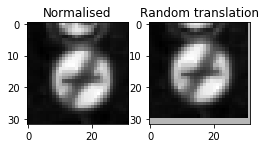

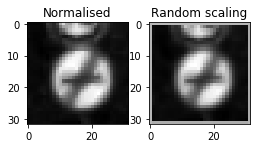

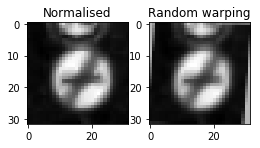

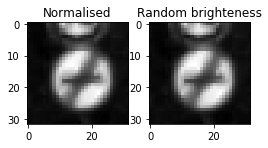

In [10]:
#Explore the effects
X_sample_translate = random_translate(sample_image_normalised)
X_sample_scaled = random_scaling(sample_image_normalised)
X_sample_warped = random_warp(sample_image_normalised)
X_sample_brightened = random_brightness(sample_image_normalised)

plotter(sample_image_normalised.squeeze(), X_sample_translate.squeeze(), "Normalised", "Random translation")
plotter(sample_image_normalised.squeeze(), X_sample_scaled.squeeze(), "Normalised", "Random scaling")
plotter(sample_image_normalised.squeeze(), X_sample_warped.squeeze(), "Normalised", "Random warping")
plotter(sample_image_normalised.squeeze(), X_sample_brightened.squeeze(), "Normalised", "Random brighteness")

In [11]:
#Data augmentation is time consuming. Only switch on for final run
augment = False

In [12]:
print('Before data augmentation: X shape is {}, y shape is: {}.'.format(X_train.shape, y_train.shape))
print('\n\n Augmenting data:')

input_indices = []
output_indices = []
if augment == True:
    for class_n in range(n_classes):
        print(class_n, ': ', end='')
        class_indices = np.where(y_train == class_n)
        n_samples = len(class_indices[0])
        if n_samples < 800:
            for i in range(800 - n_samples):
                input_indices.append(class_indices[0][i%n_samples])
                output_indices.append(X_train.shape[0])
                new_img = X_train[class_indices[0][i % n_samples]]
                new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
                X_train = np.concatenate((X_train, [new_img]), axis=0)
                y_train = np.concatenate((y_train, [class_n]), axis=0)
                if i % 50 == 0:
                    print('|', end='')
                elif i % 10 == 0:
                    print('-',end='')
        print('')
     
    print('\n\nAfter data augmentation: X shape is {}, y shape is: {}.'.format(X_train.shape, y_train.shape))
    #Pickle to avoid having to repeat data augmentation (time consuming)
    pickle.dump(X_train,open("save.p", "wb"))
    pickle.dump(y_train,open("save2.p", "wb"))
    print('X_train and y_train have been succesffully pickled')
else:
    print('Augmented X_train and y_train loaded from pickle file.')
    X_train = pickle.load(open("save.p","rb"))
    y_train = pickle.load(open("save2.p", "rb"))

Before data augmentation: X shape is (34799, 32, 32, 1), y shape is: (34799,).


 Augmenting data:
Augmented X_train and y_train loaded from pickle file.


In [13]:
X_train.shape

(46480, 32, 32, 1)

In [14]:
y_train.shape

(46480,)

In [15]:
num_samples_per_class = []
for i in range(0, n_classes):
    x_select = X_train[y_train == i] #select all images to be in that class (still 4d object)
    num_samples_per_class.append(len(x_select)) #count num per class for bar chart below

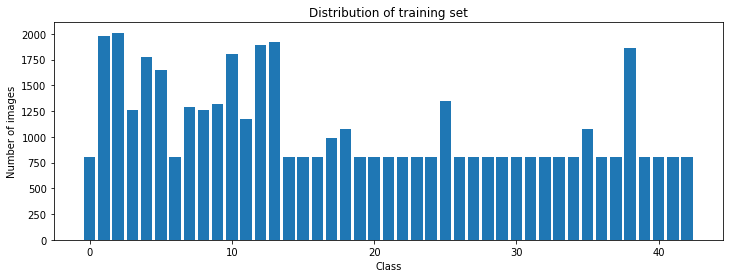

[ 800 1980 2010 1260 1770 1650  800 1290 1260 1320 1800 1170 1890 1920  800
  800  800  990 1080  800  800  800  800  800  800 1350  800  800  800  800
  800  800  800  800  800 1080  800  800 1860  800  800  800  800]


In [16]:
#Review effects of data augmentation
plt.figure(figsize = (12,4))
plt.bar(range(0,n_classes), num_samples_per_class)
plt.title("Distribution of training set")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.savefig("augmented_ The data.png")
plt.show()
print(np.bincount(y_train))

In [17]:
#From above images, it's clear that there are some redundant pixels around edge of image. 
#Crop these to focus NN to learn features relevant to sign
#Will also speed up learning
#Crop the entire 4d NumPy array across the image hieght and width dimensions
crop_margin = 3
X_cropped = X_train[:,crop_margin:32-crop_margin,crop_margin:32-crop_margin,:]
print('Entire 4d NumPy array has been cropped across image height and image width dimensions (2nd and 3rd dimensions')
print('X_cropped shape: {}'.format(X_cropped.shape))

Entire 4d NumPy array has been cropped across image height and image width dimensions (2nd and 3rd dimensions
X_cropped shape: (46480, 26, 26, 1)


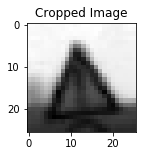

In [18]:
sample_cropped = X_cropped[0,:,:,:]
plt.figure(figsize = (4,2))
plt.title('Cropped Image')
plt.imshow(sample_cropped.squeeze(), cmap = 'gray')

In [19]:
X_cropped.dtype

dtype('float64')

In [20]:
X_cropped = X_cropped.astype('float32')

In [21]:
X_cropped.dtype

dtype('float32')

In [22]:
X_valid.shape

(4410, 32, 32, 1)

In [23]:
X_valid = X_valid[:,crop_margin:32-crop_margin,crop_margin:32-crop_margin,:].astype('float32')

In [24]:
X_valid.shape

(4410, 26, 26, 1)

In [25]:
X_test.shape

(12630, 32, 32, 1)

In [26]:
X_test = X_test[:,crop_margin:32-crop_margin,crop_margin:32-crop_margin,:].astype('float32')

In [27]:
X_test.shape

(12630, 26, 26, 1)

In [28]:
X_test.dtype

dtype('float32')

### Model Architecture

In [29]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1

#To handle convolutions of any size (no ReLU to follow)
def conv_layer(X, W, d_in, d_out):
    conv_W = tf.Variable(tf.truncated_normal(shape = (W,W,d_in,d_out), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(d_out))
    X = tf.nn.conv2d(X, conv_W, strides = [1,1,1,1], padding = 'SAME') #new = (input - filter + 2*P)/S + 1
    return X + conv_b

#To handle convolutions of any size with ReLU
def conv_relu_layer(X, W, d_in, d_out):
    conv_W = tf.Variable(tf.truncated_normal(shape = (W,W,d_in,d_out), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(d_out))
    X = tf.nn.conv2d(X, conv_W, strides = [1,1,1,1], padding = 'SAME') 
    X = X + conv_b
    return tf.nn.relu(X)

#Maxpooling with stride = 1
def pool_stride_1(X, W):
    return tf.nn.max_pool(X, ksize = [1,W,W,1], strides = [1,1,1,1], padding = 'SAME') #same padding to get back same size image

#Maxpooling with stride = s
def pool_stride_s(X, W, s):
    return tf.nn.max_pool(X, ksize = [1,W,W,1], strides = [1,s,s,1], padding = 'SAME')

#Fully connected layer
def fc_layer(X, a, b):
    fc_W = tf.Variable(tf.truncated_normal(shape = (a,b), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(b))
    fc = tf.add(tf.matmul(X, fc_W), fc_b)
    return tf.nn.relu(fc)

def inception_module(X, d_in, d_out):
    #maxpool followed by 1x1
    maxpool = pool_stride_1(X, 3) #pool with 3x3 kernel 
    conv_maxpool = conv_layer(maxpool, 1, d_in, d_out) #1x1 convolution
    #1x1 convolution direct to output (no ReLU)
    conv1 = conv_layer(X, 1, d_in, d_out)
    #1x1 convolution with ReLU then 3x3 convolution to output
    conv3 = conv_relu_layer(X, 1, d_in, d_hidden)
    conv3 = conv_layer(conv3, 3, d_hidden, d_out)
    #1x1 convolution with ReLU then 5x5 convolution to output
    conv5 = conv_relu_layer(X, 1, d_in, d_hidden)
    conv5 = conv_layer(conv5, 5, d_hidden, d_out)
    #Concat outputs and apply overall ReLU
    #Concat along 3rd axis i.e. 4th dimension. 
    #Output of inception_module is therefore 4*d_out long
    return tf.nn.relu(tf.concat(3, [conv1, conv3, conv5, conv_maxpool]))

d_hidden = 32

def CNN(x):  
    conv_1 = conv_relu_layer(x, 5, 1, 6) #Input = 26x26x1 Output = 26x26x6
    conv_2 = conv_relu_layer(conv_1, 3, 6, 16) #Input = 26x26x6 Output = 26x26x16
    incept1 = inception_module(conv_2, 16, 64) #Input = 26x26x256 Output = 26x26x256 (256=4x64 from concat)
    maxpool1 = pool_stride_s(incept1, 2, 2) #Input = 26x26x6256 Output = 13x13x256
    conv_3 = conv_relu_layer(maxpool1, 1, 256, 256)
    fc0 = flatten(conv_3)
    fc1 = fc_layer(fc0, 256*13*13, 512)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    logits = fc_layer(fc1, 512, n_classes)
    return logits

print('done')

done


In [30]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 26, 26, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

print('done')



done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [31]:
lr = 0.0009

logits = CNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation)

In [32]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


In [ ]:
train = False

In [33]:
if train == True:
    EPOCHS = 20
    BATCH_SIZE = 512
    from sklearn.utils import shuffle

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_cropped)

        print("Training...")
        print()
        val_acc_list = []
        for i in range(EPOCHS):
            X_input, y_input = shuffle(X_cropped, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_input[offset:end], y_input[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            validation_accuracy = evaluate(X_valid, y_valid)
            val_acc_list.append(validation_accuracy)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}, Current learning rate (x10-6) = {:.3f}".format(validation_accuracy, lr*1000000))
            if ((i+1) <= 10 and (i+1) % 5 == 0):
                lr = lr * 0.8
            elif ((i+1) > 10 and (i+1) % 5 == 0):
                lr *= lr * 0.6
        saver.save(sess, 'CNN')
        print("Model saved")



Training...

EPOCH 1 ...
Validation Accuracy = 0.585, Current learning rate (x10-6) = 900.000
EPOCH 2 ...
Validation Accuracy = 0.793, Current learning rate (x10-6) = 900.000
EPOCH 3 ...
Validation Accuracy = 0.854, Current learning rate (x10-6) = 900.000
EPOCH 4 ...
Validation Accuracy = 0.895, Current learning rate (x10-6) = 900.000
EPOCH 5 ...
Validation Accuracy = 0.919, Current learning rate (x10-6) = 900.000
EPOCH 6 ...
Validation Accuracy = 0.936, Current learning rate (x10-6) = 720.000
EPOCH 7 ...
Validation Accuracy = 0.948, Current learning rate (x10-6) = 720.000
EPOCH 8 ...
Validation Accuracy = 0.951, Current learning rate (x10-6) = 720.000
EPOCH 9 ...
Validation Accuracy = 0.946, Current learning rate (x10-6) = 720.000
EPOCH 10 ...
Validation Accuracy = 0.957, Current learning rate (x10-6) = 720.000
EPOCH 11 ...
Validation Accuracy = 0.959, Current learning rate (x10-6) = 576.000
EPOCH 12 ...
Validation Accuracy = 0.958, Current learning rate (x10-6) = 576.000
EPOCH 13 ...

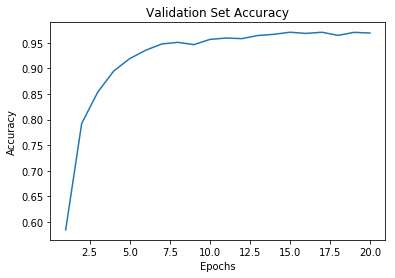

In [34]:
epochs = []
for i in range(EPOCHS):
    epochs.append(i+1)
plt.plot(epochs, val_acc_list)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Set Accuracy')
plt.savefig('accuracy.png')
plt.show()

In [35]:
#Test set predictions

#Load metadata e.g. graph structure from saved training data, and then run test data on this (X_test already normalised)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./CNN.meta')
    saver2.restore(sess, "./CNN")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.955


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Below are some German traffic signs downloaded from internet. Some are not from original dataset.
Will be fun to see what it predicts for these and with what level of confidence.
Perhaps could use this to find threshold confidence that the car must have before it trusts a sign is truly genuine.


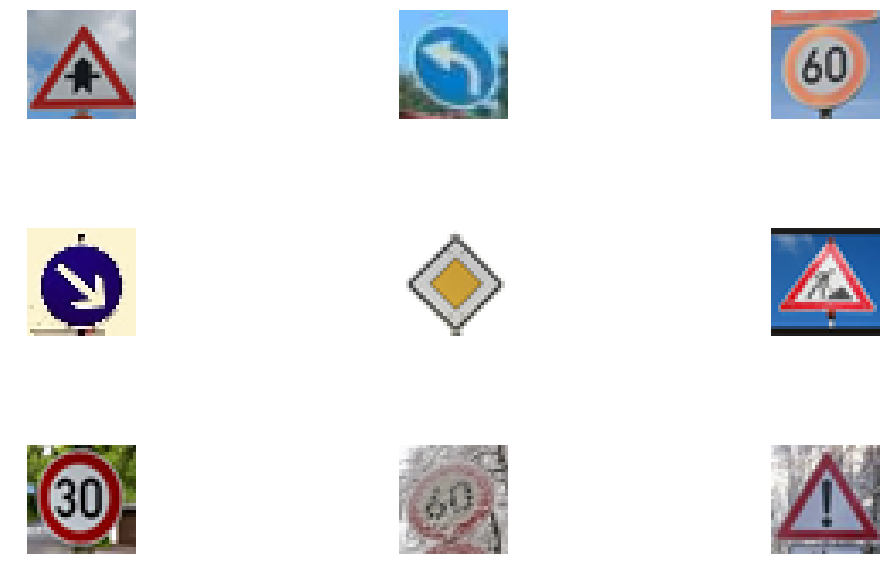

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image (glob finds anything with given suffix i.e. *.png)
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(20, 10))
fig.subplots_adjust(hspace = 1, wspace=.001)
axs = axs.ravel()


my_images=[]

print("Below are some German traffic signs downloaded from internet. Some are not from original dataset.")
print("Will be fun to see what it predicts for these and with what level of confidence.")
print("Perhaps could use this to find threshold confidence that the car must have before it trusts a sign is truly genuine.")
for i, img in enumerate(glob.glob('../*test.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)




In [34]:
len(my_images)

9

### Predict the Sign Type for Each Image

In [35]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import numpy as np
print("Images need to be converted to grayscale, normalised and cropped before suitable for network.")
my_images = np.asarray(my_images)

my_images_gray = np.sum(my_images/3,  axis = 3, keepdims=True)

my_images_normalized = (my_images_gray - my_images_gray.mean())/(my_images_gray.std() + 1e-8) 

print(my_images_normalized.shape)

crop_margin=3
my_images_cropped = my_images_normalized[:,crop_margin:32-crop_margin,crop_margin:32-crop_margin,:]
print(my_images_cropped.shape)

Images need to be converted to grayscale, normalised and cropped before suitable for network.
(9, 32, 32, 1)
(9, 26, 26, 1)


### Analyze Performance

In [36]:
#### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import tensorflow as tf
BATCH_SIZE = 512
my_labels = [11, 34, 3, 38, 12, 25, 1, 3, 18]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./CNN.meta')
    saver3.restore(sess, "./CNN")
    my_accuracy = evaluate(my_images_cropped, my_labels)
    print("Internet Image Set Accuracy = {:.3f}".format(my_accuracy))

Internet Image Set Accuracy = 0.889


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

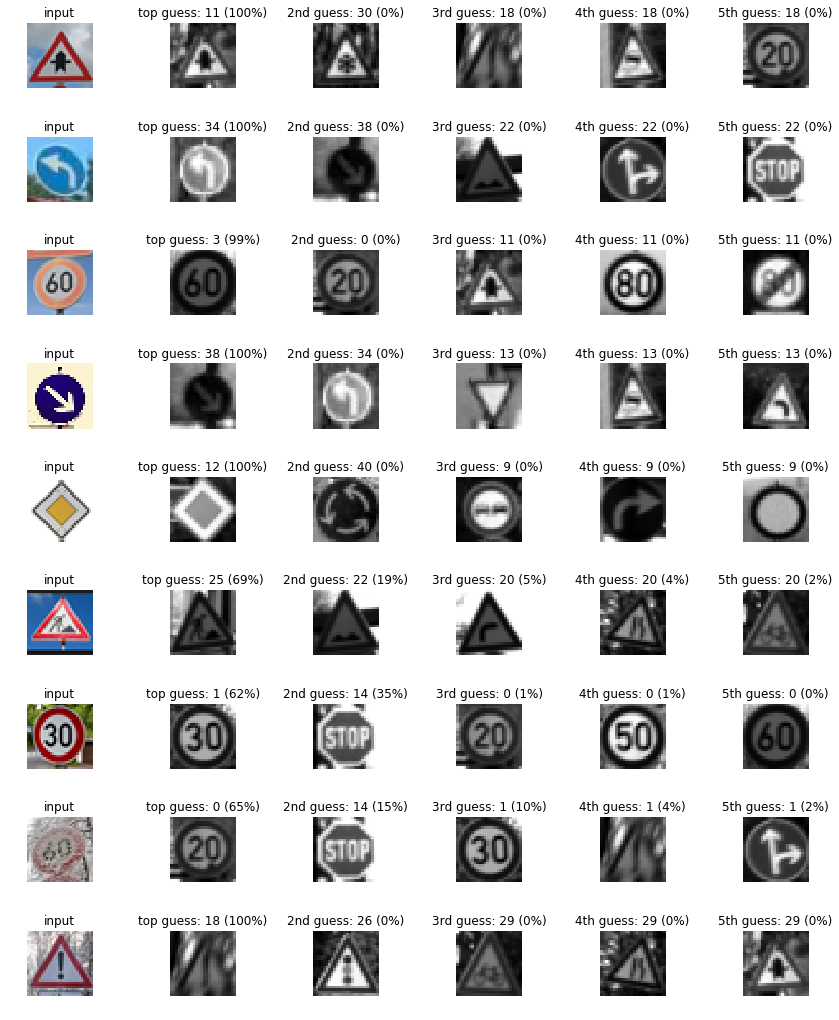

In [42]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./CNN.meta')
    saver.restore(sess, "./CNN")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_cropped, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_cropped, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),6, figsize=(14, 18))
    fig.subplots_adjust(hspace = 0.6, wspace=1.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[6*i].axis('off')
        axs[6*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[6*i].set_title('input')
        guess1 = my_top_k[1][i][0] #get index of top guess
        index1 = np.argwhere(y_valid == guess1)[0] #find an image from X_valid of this top guess
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0])) #print percentage conf
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_valid == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_valid[index4].squeeze(), cmap='gray')
        axs[6*i+4].set_title('4th guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][3]))
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_valid == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_valid[index5].squeeze(), cmap='gray')
        axs[6*i+5].set_title('5th guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][4]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [40]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            

In [41]:
checkthisoneout = my_images[1,:,:,:]
outputFeatureMap(checkthisoneout, CNN)

AttributeError: 'function' object has no attribute 'eval'

# BELOW IS MY FIRST ATTEMPT TO BUILD AN INCEPTION MODULE
### Unfortunately this led to memory overflow on g2.2xlarge instance (which is what I have AWS credits 

### Use simpler inception module above but have kept the code for potential future use

# Below is a working CNN that doesn't use inception module
### Rejected this as accuracy not as good as when using inception module

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def CNN(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 26x26x1. Output = 26x26x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='SAME')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 13x13x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(4, 4, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits

print('done')